# A COMPARATIVE AQI ANALYSIS: URBANIZATION, POPULATION AND MANUFACTURING



##Problem statement
To conduct a comprehensive analysis of the correlation and relationship between air pollution levels and certain factors such as manufacturing levels, population density, and urbanization in different countries and cities. The goal of this study is to identify the main factors that contribute to air pollution levels, and how they are correlated in different countries, using statistical methods and machine learning techniques. With this understanding, the project aims to find the pollution levels based on the identified factors, using a combination of various models, and evaluating their performance. The model will be deployed and made available for use, and continuously monitored for performance and updated as needed.

##Introduction
### Section 1
In the first section, we will be exploring the correlation between the Air Quality Index (AQI) level of cities with a population over 750,000 and their population. The AQI level will be calculated using data from 2022 and the population data will be collected from 2023. We will be using data from two different datasets, namely "population-cities-data.csv" and "air-pollution-rank-cities-2022.csv", to achieve this. The AQI level will be determined by dividing it into different categories, including "Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", and "Hazardous". This information will then be used to create scatter plots, heatmaps, and histograms to visually explore the relationship between AQI levels and city populations.

### Section 2
The second section of the analysis is focused on finding the correlation level between the country population and AQI (air quality index) levels. We first retrieve population data for the countries and 2022 AQI data from two separate CSV files. Next, we determine the AQI level description for each country based on their AQI value. Using the population and AQI data, we find the correlation level between them and create a scatter plot to visually represent the correlation. We also create a heatmap to show the correlation between population and AQI and a histogram to display the number of countries per AQI level. Lastly, we create a world map to visualize the AQI levels of countries based on their location.

### Section 3
In this section, we will be exploring the correlation between the manufacturing level of countries and their Air Quality Index (AQI) level. To accomplish this, we will first merge the manufacturing data and the AQI data for all countries into a single dataframe. Then, we will calculate the correlation between the two variables and visualize it through a scatter plot, heatmap, and histogram. Additionally, we will classify countries into different manufacturing levels based on their manufacturing output and create a bar plot to represent the distribution of countries in each manufacturing level. Finally, we will group the dataframe by the manufacturing level and print out the countries in each level.

##Methodology
1. **Data Collection:** Gather data on air pollution levels, manufacturing levels, population density, and urbanization for countries and cities. This data can be obtained from various sources such as government websites, data portals, and research studies.


2. **Data Cleaning:** Clean and preprocess the data to ensure that it is in a format that can be easily analyzed. This may involve removing missing or duplicate values, handling outliers, and transforming variables as needed.


3. **Exploratory Data Analysis:** Use visualization techniques to explore the data and identify patterns, trends, and outliers. Create visualizations such as histograms, scatter plots, and heatmaps to understand the relationships between the variables.


4. **Feature Selection:** Select the most relevant variables to include in the model by using techniques such as correlation analysis and feature importance.


5. **Model Building:** Build a model to predict air pollution levels based on the selected features.


6. **Model Evaluation:** Evaluate the performance of the model using metrics.


7. **Model Deployment:** Deploy the model in a web application or API for others to use.

<br>

# AIR QUALITY INDEX (AQI) OF CITIES WITH A POPULATION OVER 750,000
## Introduction

In this section, we will be analyzing the Air Quality Index (AQI) data of cities with a population over 750,000. We will be using a dataset that contains the population of 5307 cities and the 2022 AQI levels for each of these cities. Our aim is to determine the AQI level of the cities and find the correlation between the AQI level and the population of these cities.


## Data Loading and Cleaning
First, let's import the required libraries:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Next, let's load the city population data and the 2022 AQI data:

In [ ]:
# Load the population data of 5307 cities
all_cities_data = pd.read_csv("population-cities-data.csv", nrows=5307)
capitals = all_cities_data["city"].tolist()

# Load the 2022 AQI data of 5307 cities
aqi_data_2022 = pd.read_csv("air-pollution-rank-cities-2022.csv", nrows=5307)
aqi_city_pop_list = aqi_data_2022['2022_avg'].tolist()

We will create a dictionary data_pop_cities to store the AQI data for the cities with a population over 750,000.

In [ ]:
# Initialize an empty dictionary to store the data
data_pop_cities = {}

# Zip the lists of cities and AQI data
zip_data_city_pop = zip(capitals, aqi_city_pop_list)

# Add only the cities that have AQI data to the dictionary
for city, aqi in zip_data_city_pop:
    if city in all_cities_data['city'].tolist():
        data_pop_cities[city] = aqi

## AQI Level Description
Let's create a function determine_aqi_level to determine the AQI level description based on the AQI value:

In [ ]:
def determine_aqi_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

We will use the function to determine the AQI level description for each city in the data_pop_cities dictionary.

In [ ]:
# Determine the AQI level description for each city
for city, aqi_info in data_pop_cities.items():
    aqi_value = aqi_info[0]
    aqi_level = determine_aqi_level(aqi_value)
    data_pop_cities[city] = (aqi_value, aqi_level)

# Create a list of AQI levels for the cities
aqi_levels = [aqi_info[1] for city, aqi_info in data_pop_cities.items()]

## Correlation between City Population and AQI
This section of code is aimed at finding the correlation level between city population and AQI in mostly urban areas.

We start by creating a new dataframe from a data dictionary containing city names and AQI values. The population column is then added to the dataframe, and the data types of both population and AQI are ensured to be numeric.

Finally, we find the correlation level between population and AQI by using the corr method of the pandas library. The result is then printed as the correlation between AQI level of capital cities and population.

In [ ]:
# Create a new dataframe from the data dictionary
data_pop_cities = list(zip(capitals,
                           aqi_city_pop_list))  # Fixing the shape of the data passed to the DataFrame constructor
# does not match the shape of the indices and columns specified.
df = pd.DataFrame(data_pop_cities, columns=['city', 'aqi'])

# Add the population column to the dataframe
df['population'] = all_cities_data['pop2023']

# Ensure that the data types of the population and AQI columns are numeric
df['population'] = df['population'].astype(float)
df['aqi'] = df['aqi'].astype(float)

# Find the correlation level between population and AQI
corr_pop_cities = df['population'].corr(df['aqi'])

print(f"The correlation between AQI Level of capital cities and population is {corr_pop_cities}")

The correlation between AQI Level of capital cities and population is 0.8595076765185515


## Scatter Plot of City Population and AQI
This section of code is aimed at creating a scatter plot to visualize the relationship between city population and AQI.

We use the scatterplot method from the seaborn library to create a scatter plot of city population (x-axis) and AQI (y-axis) based on the data in the df dataframe.

The plot is then adjusted by setting the title, x-label, and y-label. The final step is to display the plot using the show method from the matplotlib library.

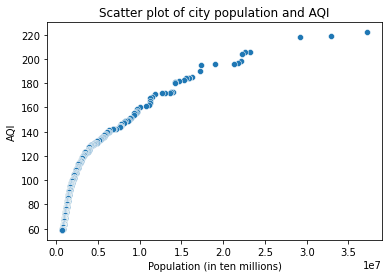

In [ ]:
# Create a scatter plot
sns.scatterplot(x='population', y='aqi', data=df)

# Adjust the labels and the title
plt.title("Scatter plot of city population and AQI")
plt.xlabel("Population (in ten millions)")
plt.ylabel("AQI")

# Show the plot
plt.show()

## Heatmap of Correlation between City Population and AQI
This section of code is aimed at creating a heatmap to visualize the correlation between city population and AQI.

We start by creating a correlation dataframe between population and AQI from the data in the df dataframe. This dataframe is then passed to the heatmap method from the seaborn library to create the heatmap.

The heatmap is then annotated to display the actual correlation values and is displayed using the show method from the matplotlib library.

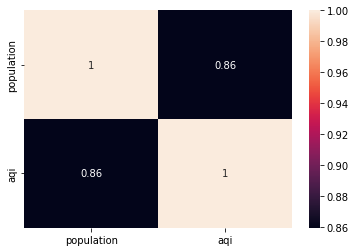

In [ ]:
# Create the correlation dataframe
corr_pop_cities_2 = df[['population', 'aqi']].corr()

# Create the heatmap
sns.heatmap(corr_pop_cities_2, annot=True)

# Show the plot
plt.show()

## Histogram of AQI Levels for Cities
This section of code is aimed at creating a histogram to show the distribution of AQI levels for cities with a population over 750,000.

We start by creating a dataframe from the AQI levels for the cities, and then pass this dataframe to the countplot method from the seaborn library to create the histogram.

The size of the bars and the font size of the labels are adjusted to make the plot more readable. Finally, the plot is displayed using the show method from the matplotlib library.

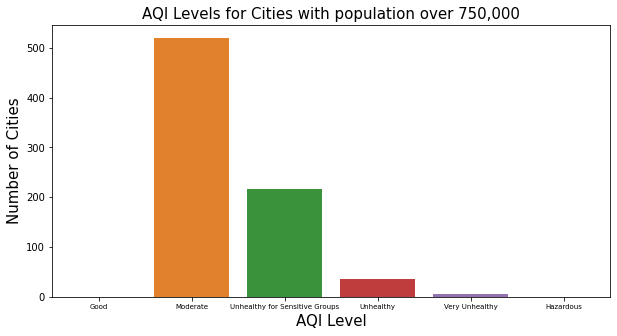

In [ ]:
# Create a dataframe from the AQI levels for the cities
data = {'AQI Level': aqi_levels}
df1 = pd.DataFrame(data)

# Create the histogram
sns.countplot(x='AQI Level', data=df1,
              order=["Good", "Moderate", "Unhealthy for Sensitive Groups", "Unhealthy", "Very Unhealthy", "Hazardous"])

# Adjust the size of the bars
plt.gcf().set_size_inches(10, 5)

# Adjust the font size of the labels
plt.xticks(fontsize=7)
plt.xlabel("AQI Level", fontsize=15)
plt.ylabel("Number of Cities", fontsize=15)
plt.title("AQI Levels for Cities with population over 750,000", fontsize=15)

# Show plot
plt.show()



## Creating of a World Map
The final step of this section is to create a world map to visualize the average AQI levels of cities with a population over 750,000. The AQI levels will be indicated by different colors on the map.

First, we define a color for each AQI level category:

In [ ]:
# Determine a colour for each AQI Level category
aqi_colors = {
    "Good": "green",
    "Moderate": "yellow",
    "Unhealthy for Sensitive Groups": "orange",
    "Unhealthy": "red",
    "Very Unhealthy": "purple",
    "Hazardous": "darkpurple"
}

Next, we load the latitude and longitude data for the cities using pd.read_csv():

In [ ]:
# Load the data
cities_lat_lon = pd.read_csv("world-cities-lat-long.csv")

cities_lat_lon

,city,city_ascii,lat,lng,country,iso2,iso3,capital,population
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,primary,39105000.0
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,primary,35362000.0
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,admin,31870000.0
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,primary,23971000.0
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,admin,22495000.0
...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,NaN,10.0
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,NaN,10.0
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,10.0
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,NaN,10.0


We then add a new column, "AQI Level", to the AQI dataframe, based on the AQI value:

In [ ]:
# Add a new column "AQI Level" to the dataframe based on the AQI value
aqi_data_2022["AQI Level"] = aqi_data_2022["2022_avg"].apply(determine_aqi_level)

We merge the AQI dataframe and the latitude and longitude dataframe on the "city" column:

In [ ]:
# Merge the two dataframes on the "city" column
merged_data_geo_aqi = pd.merge(aqi_data_2022, cities_lat_lon, on='city')

Finally, we create an empty map using folium.Map() and add markers to the map for each city, with a popup showing the city name, average AQI value, and AQI level. The marker color is based on the AQI level category defined earlier:

In [ ]:
# Create a dropdown menu with all countries alphabetically
country_select = widgets.Dropdown(
options=["All Countries"] + sorted(list(merged_data_geo_aqi["country_y"].unique())),
description="Select a country:",
value="All Countries"
)

# Show the dropdown menu
display(country_select)

# Define a function to get the first city's latitude and longitude for a selected country
def get_first_city_lat_lon(country):
    if country == "All Countries":
        return [0, 0]
    else:
        data = merged_data_geo_aqi[merged_data_geo_aqi["country_y"] == country]
        first_city_lat = data.iloc[0]["lat"]
        first_city_lon = data.iloc[0]["lng"]
        return [first_city_lat, first_city_lon]

# Define a function to update the map based on the selected country
def update_map(country):
    location = get_first_city_lat_lon(country)
    world_map_1 = folium.Map(location=location, zoom_start=4)

    if country == "All Countries":
        data = merged_data_geo_aqi
    else:
        data = merged_data_geo_aqi[merged_data_geo_aqi["country_y"] == country]

    for index, row in data.iterrows():
        folium.Marker(
            location=[row["lat"], row["lng"]],
            popup=f"City: {row['city']}<br>AQI: {row['2022_avg']}<br>AQI Level: {row['AQI Level']}",
            icon=folium.Icon(color=aqi_colors[row["AQI Level"]])
        ).add_to(world_map_1)

    display(world_map_1)

# Call the update_map function when the country selection changes
widgets.interactive(update_map, country=country_select)

Dropdown(description='Select a country:', options=('All Countries', 'Algeria', 'Andorra', 'Angola', 'Argentina…

interactive(children=(Dropdown(description='Select a country:', options=('All Countries', 'Algeria', 'Andorra'…

With this code, we have created a map showing the average AQI levels for cities with a population over 750,000.

<br>

# CORRELATION BETWEEN COUNTRY POPULATION AND AQI LEVEL
## Introduction
This code aims to find the correlation between the population of a country and the average air quality index (AQI) of that country. The AQI is a measure of the concentration of pollutants in the air, with higher values indicating worse air quality.

## Reading in Data
In this section, two csv files are read in using the pd.read_csv function from the pandas library.

<li> The first file, "population-cities-data.csv", contains population data for cities. The population data for 2023 is extracted and stored in the variable "population_city".
<li>The second file, "air-pollution-rank-countries.csv", contains AQI data for countries. The list of countries and the average AQI for each country in 2022 is extracted and stored in the variables "countries" and "aqi_country_pop_list" respectively.

In [ ]:
# Read in population data for cities
population_data_city = pd.read_csv("population-cities-data.csv")
population_city = population_data_city['pop2023']

# Read in AQI data for countries
all_countries_data = pd.read_csv("air-pollution-rank-countries.csv")
countries = all_countries_data["country"].tolist()
aqi_country_pop_list = all_countries_data["2022-avg"].tolist()

## Data Preparation
In this section, a dictionary is created to associate each country with its AQI data. The dictionary is created using the zip function and stored in the "data_pop_countries" variable.

In [ ]:
# Create a dictionary to associate each country with its AQI data
data_pop_countries = dict(zip(countries, aqi_country_pop_list))

## Determine AQI Level
In this section, a for loop is used to iterate through the lists of countries and their corresponding AQI values. For each iteration of the loop, the determine_aqi_level function is called, passing in the AQI value of the current country. The function returns the AQI level for the current country, which is then printed.

In [ ]:
# Determine AQI Level for each country
for country, aqi in zip(countries, aqi_country_pop_list):
    aqi_level = determine_aqi_level(aqi)
    # Check the data
    print(f"{country} AQI Level: {aqi_level}")

Bangladesh AQI Level: Unhealthy
Kuwait AQI Level: Unhealthy
Chad AQI Level: Unhealthy for Sensitive Groups
United Arab Emirates AQI Level: Unhealthy for Sensitive Groups
India AQI Level: Moderate
Iraq AQI Level: Moderate
Pakistan AQI Level: Moderate
Sudan AQI Level: Moderate
Bahrain AQI Level: Moderate
Nepal AQI Level: Moderate
Armenia AQI Level: Moderate
China AQI Level: Moderate
Iran AQI Level: Moderate
Bosnia And Herzegovina AQI Level: Moderate
Ethiopia AQI Level: Moderate
Mexico AQI Level: Good
Uzbekistan AQI Level: Good
Macedonia AQI Level: Good
North Korea AQI Level: Good
Turkey AQI Level: Good
Jordan AQI Level: Good
Mali AQI Level: Good
Chile AQI Level: Good
Korea, South AQI Level: Good
Macau AQI Level: Good
Cote D’Ivoire AQI Level: Good
El Salvador AQI Level: Good
Malta AQI Level: Good
Israel AQI Level: Good
Turkmenistan AQI Level: Good
Taiwan AQI Level: Good
Hong Kong AQI Level: Good
Madagascar AQI Level: Good
Egypt AQI Level: Good
Montenegro AQI Level: Good
Georgia AQI Level:

## Finding Correlation Level Between The Population of Countries AND AQI
The correlation level between the population and AQI level of countries is determined. The population data of countries is read in from a CSV file named "population_data.csv" using the pd.read_csv function from the pandas library. The data type of the population column is changed to float using the astype method. The correlation level between the population and AQI level of countries is calculated using the corr method and stored in the variable corr_pop_country. The correlation coefficient can range from -1 to 1, with a value of 1 indicating a strong positive correlation, a value of -1 indicating a strong negative correlation, and a value of 0 indicating no correlation.

In [ ]:
# Add the country population column to from a CSV file
population_data_country = pd.read_csv("population_data.csv")

# Ensure that the data type of the population column is numeric
population_data_country['pop2023'] = population_data_country['pop2023'].astype(float)

# Find the correlation level between population and AQI
corr_pop_country = population_data_country['pop2023'].corr(all_countries_data['2022-avg'])

# print the correlation level
print(f"The correlation between AQI Level of countries and population is {corr_pop_country}")

The correlation between AQI Level of countries and population is 0.7990787995356463


##Creating the Scatter Plot
To analyze the relationship between population and AQI level, we first need to merge the two datasets population_data_country and all_countries_data. The data frames will be merged on the "country" column, so that the data in each data frame corresponds to the same country.

In [ ]:
merged_data_1 = pd.merge(population_data_country, all_countries_data, on='country')

With the merged data, we can now create a scatter plot to visualize the relationship between population and AQI level. The population data will be plotted on the x-axis, and the AQI level on the y-axis. To make the plot easier to interpret, we add labels to the x and y-axes. Finally, we display the scatter plot.

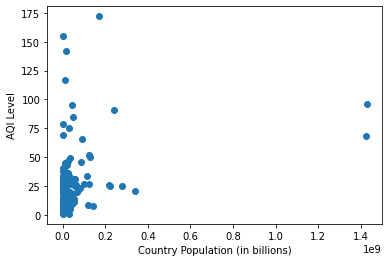

In [ ]:
plt.scatter(merged_data_1['pop2023'], merged_data_1['2022-avg'])

plt.xlabel("Country Population (in billions)")
plt.ylabel("AQI Level")

plt.show()

## Heatmap of AQI Level vs. Population
In this section, we will create a heatmap to visualize the correlation between the population and AQI (Air Quality Index) of different countries. We will use the seaborn library to create the heatmap.

To create a heatmap between AQI level and population, we start by creating a DataFrame with two columns: population and AQI. The population data is read from a CSV file and the AQI data is stored in a list.

In [ ]:
# Create a dataframe with population and AQI data
df2 = pd.DataFrame({"population": population_data_country['pop2023'], "AQI": all_countries_data['2022-avg']})

Next, we calculate the correlation between population and AQI. The correlation is calculated using the corr() method from the pandas library.

In [ ]:
# Calculate the correlation between population and AQI
corr = df2.corr()

Finally, we create the heatmap of AQI level vs. population. To create the heatmap, we use the heatmap() method from the seaborn library. The annot parameter is set to True to display the correlation value for each pair in the heatmap. The cmap parameter is set to 'coolwarm' to specify the color palette for the heatmap.

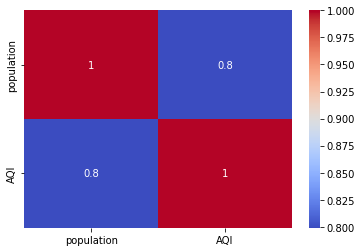

In [ ]:
# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

The resulting heatmap provides a graphical representation of the correlation between AQI level and population. The color intensity in the heatmap shows the strength of the correlation, with dark red indicating a strong positive correlation, and dark blue indicating a strong negative correlation.

## Histogram of AQI Levels for Countries
In this part of the code, we will be creating a histogram to visualize the distribution of AQI levels in different countries.

We first create an empty dictionary, aqi_level_counts, to store the number of countries in each AQI level.

In [ ]:
# Create a dictionary to store the number of countries per AQI level
aqi_level_counts = {}

Next, we use a for loop to iterate through the countries and aqi_country_pop_list lists. We use the determine_aqi_level function to determine the AQI level for each country. If the AQI level is already present in the aqi_level_counts dictionary, we increment its value by 1. Otherwise, we add a new key-value pair to the dictionary, with the AQI level as the key and a value of 1.

In [ ]:
# Count the number of countries in each AQI level
for country, aqi in zip(countries, aqi_country_pop_list):
    aqi_level = determine_aqi_level(aqi)
    if aqi_level in aqi_level_counts:
        aqi_level_counts[aqi_level] += 1
    else:
        aqi_level_counts[aqi_level] = 1

We then create a new dataframe, df3, from the aqi_level_counts dictionary. The orient parameter is set to 'index' to indicate that the dictionary keys should be used as the index for the dataframe.


In [ ]:
# Create a dataframe from the aqi_level_counts dictionary
df3 = pd.DataFrame.from_dict(aqi_level_counts, orient='index', columns=['Number of Countries'])

Finally, we create a bar plot using the plot method of df3. We use the kind parameter to specify that we want a bar plot, and set the width parameter to 0.5. We adjust the size of the plot using the set_size_inches method, and set the font size of the labels using the fontsize parameter. We also rotate the x-axis labels to make them easier to read. The final step is to display the plot using the show method.

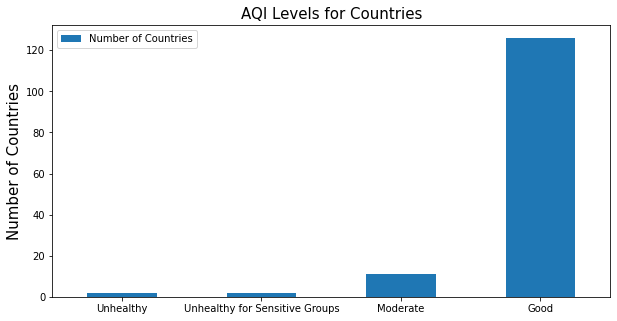

In [ ]:
# Create the histogram
df3.plot(kind='bar', width=0.5)

# Adjust the size of the bars
plt.gcf().set_size_inches(10, 5)

# Adjust the font size of the labels
plt.xticks(rotation=0)
plt.ylabel("Number of Countries", fontsize=15)
plt.title("AQI Levels for Countries", fontsize=15)

# Show the plot
plt.show()

## Creating of a World Map
This code block creates a world map using the Folium library. The map shows the average Air Quality Index (AQI) levels of different countries. The markers on the map are colored based on the AQI levels, and the size of the markers represents the average AQI levels.

First, the code loads the data for the countries and their corresponding latitude and longitude values. This data is stored in a CSV file, which is read into a pandas dataframe using the pd.read_csv() method.

In [ ]:
# Load the data
countries_lat_lon = pd.read_csv("world_countries_lat_long.csv")

Next, the two dataframes are merged on the "country" column, to match the AQI data with the location data.

In [ ]:
# Merge the two dataframes on the "city" column
merged_data_loc_country = pd.merge(all_countries_data, countries_lat_lon, on='country')

Then, a world map is created using the Folium library. The folium.Map() method is used, with the location parameter set to [0, 0] and the zoom_start parameter set to 2. This creates a world map centered around the equator, with a zoom level of 2.

In [ ]:
# Create a world map
world_map_2 = folium.Map(location=[0, 0], zoom_start=2)

A function color_aqi() is defined to color the markers based on the AQI levels. The function takes an AQI level as an argument and returns a color code based on the AQI level.

In [ ]:
# Define a function to color the countries based on their AQI levels
def color_aqi(aqi):
    if 0 <= aqi <= 50:
        return 'green'
    elif 50 < aqi <= 100:
        return 'yellow'
    elif 100 < aqi <= 150:
        return 'orange'
    elif 150 < aqi <= 200:
        return 'red'
    elif 200 < aqi <= 300:
        return 'purple'
    else:
        return 'grey'

Next, the code uses the iterrows() method to iterate through the merged dataframe. For each row in the dataframe, a folium.CircleMarker object is created, with the location parameter set to the latitude and longitude values of the country. The radius parameter is set to 5, and the color parameter is set to the color code returned by the color_aqi() function. The fill parameter is set to True to fill the marker.

A child popup is added to the marker using the add_child() method, with the text content being the country name and its AQI level. Finally, the marker is added to the world map using the add_to() method.

In [ ]:
# Iterate through the dataframe and add markers to the map
for i, row in merged_data_loc_country.iterrows():
    folium.CircleMarker(location=[row['lat'], row['lng']], radius=5, color=color_aqi(row['2022-avg']),
                        fill=True).add_child(
        folium.Popup(row['country'] + " AQI Level: " + str(row['2022-avg']))).add_to(world_map_2)

After all the markers have been added, the map is displayed using the world_map object.

In [ ]:
# Show the map
world_map_2

<br>

# CORRELATION LEVEL BETWEEN MANUFACTURING LEVEL AND AQI
##Introduction
In this section, we will be analyzing the correlation between the manufacturing level and the air quality index (AQI) of different countries. The goal is to find out if there is any relationship between the two variables, which can give us some insights into how different industries are affecting the air quality.

## Data Merging
In this step, we are merging two datasets, one containing the manufacturing level information and another containing AQI information. The two datasets are merged on the "country" column, which ensures that we are combining the information of the same countries in both datasets. Here's the code for this step:

In [ ]:
# Merge the manufacturing_data and all_countries_data dataframes on the 'country' column
manufacturing_data = pd.read_csv("manufacturing-data-country.csv")
merged_man_df = pd.merge(manufacturing_data, all_countries_data, on='country')

## Create A Numerical Rank
Now, we are creating a new column in the merged dataframe to store the numerical rank of the manufacturing level of each country. The "rank" column is used to find the rank of each value, and the rank function is used to calculate the rank. The method parameter is set to "min", which means that in case of ties, the lowest rank is assigned to all tied values. The ascending parameter is set to False, which means that higher values will be given higher ranks.

In [ ]:
# Create a new column for the numerical rank
manufacturing_rank = merged_man_df['rank'].rank(method='min', ascending=False)

## Calculate the Correlation Level
In this final step, we are calculating the correlation level between the AQI and the manufacturing level. The corr function is used to calculate the correlation, and the two variables that we are comparing are the "manufacturing_rank" column and the "2022-avg" column, which contains the average AQI of each country in the year 2022.

In [ ]:
# Find the correlation level between manufacturing level and AQI
corr_manufacturing = manufacturing_rank.corr(merged_man_df['2022-avg'])

## Creating the Scatter Plot

We create a scatter plot to visualize the relationship between manufacturing rank and average AQI level of countries.

The plt.scatter function creates a scatter plot of the data in the manufacturing_rank and merged_man_df['2022-avg'] columns. The plt.xlabel and plt.ylabel functions adjust the labels on the x-axis and y-axis respectively. The plt.show function displays the plot.

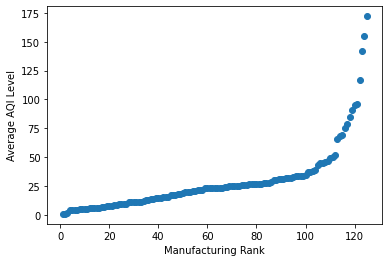

In [ ]:
# Create a scatter plot of the manufacturing rank and average AQI
plt.scatter(manufacturing_rank, merged_man_df['2022-avg'])

# Adjust the labels
plt.xlabel("Manufacturing Rank")
plt.ylabel("Average AQI Level")

# Show the plot
plt.show()

## Heatmap of Correlation Between Manufacturing Rank and AQI Level

This section of the code is responsible for creating a heatmap that visualizes the correlation between the manufacturing rank of countries and their average AQI levels in 2022. The heatmap is created using the sns.heatmap() function from the Seaborn library.


The first step is to create a dataframe with two columns, one for the manufacturing rank of countries, and the other for their average AQI levels in 2022. This is done using the pd.DataFrame() method and passing in a dictionary that maps the column names to the data. The resulting dataframe df4 contains the data for both columns.

In [ ]:
# Create a dataframe with manufacturing rank and AQI data
df4 = pd.DataFrame({"manufacturing_rank": manufacturing_rank, "AQI": merged_man_df['2022-avg']})

Next, the correlation between the manufacturing rank and the average AQI levels is calculated. This is done by calling the corr() method on the df4 dataframe. The resulting correlation matrix is stored in the corr variable.

In [ ]:
# Calculate the correlation between manufacturing rank and AQI
corr = df4.corr()

The heatmap is then created using the sns.heatmap() function from the Seaborn library. The annot argument is set to True to display the correlation values on the heatmap. The cmap argument is set to 'coolwarm' to specify the color map to use for the heatmap. Finally, the plot is displayed using the plt.show() method.


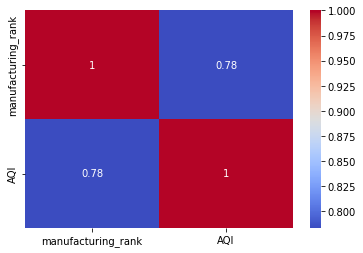

In [ ]:
# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Histogram of Manufacturing Level
This section of code creates a histogram using the sns.regplot function from the seaborn library to visualize the relationship between the manufacturing rank and the average AQI level of countries. The x-axis represents the manufacturing rank of countries and the y-axis represents the average AQI level of countries.

The first line of code creates a scatter plot of the manufacturing rank and average AQI level data using the sns.regplot function. The x argument is set to manufacturing_rank which represents the manufacturing rank of countries, and the y argument is set to merged_man_df['2022-avg'] which represents the average AQI level of countries. The line_kws argument is used to set the color, opacity, and line width of the regression line. The next two lines of code set the labels for the x-axis and y-axis and add a title to the plot. The final line of code shows the plot.

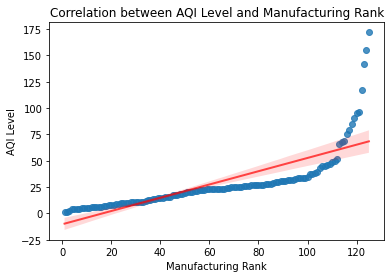

In [ ]:
# Create the scatter plot
sns.regplot(x=manufacturing_rank, y=merged_man_df['2022-avg'], line_kws={"color": "r", "alpha": 0.7, "lw": 2})

# Add labels and a title
plt.xlabel("Manufacturing Rank")
plt.ylabel("AQI Level")
plt.title("Correlation between AQI Level and Manufacturing Rank")

# Show the plot
plt.show()

## Classifying the Manufacturing Level

The aim of this section is to classify the countries based on their manufacturing level. The '2021' column in the data frame contains the manufacturing rank of the countries, which will be used to classify them into 4 manufacturing levels: 'Low', 'Mid', 'High', and 'Very-high'.

We first replace the missing values in the '2021' column with the mean value using the fillna() method.

In [ ]:
# Replace null values with 0
merged_man_df['2021'].fillna(merged_man_df['2021'].mean(), inplace=True)

Next, we use the pd.cut() method to classify the countries based on the manufacturing rank. The bins variable contains the values that will be used to define the four manufacturing levels, and the labels variable contains the names of the levels.

The pd.cut() method will return a categorical variable with the labels assigned to each country based on their manufacturing rank. This categorical variable is then assigned to the 'manufacturing_level' column in the data frame.

In [ ]:
# Create a column for the manufacturing level bins
bins = [0, 5, 15, 25, 40]
labels = ['Low', 'Mid', 'High', 'Very-high']
merged_man_df['manufacturing_level'] = pd.cut(merged_man_df["2021"], bins=bins, labels=labels)

We use the value_counts() method to count the number of countries in each manufacturing level. The counts are assigned to the man_level_counts variable.

In [ ]:
# Count the number of countries in each manufacturing level
man_level_counts = merged_man_df['manufacturing_level'].value_counts(sort=False)

We can create a bar plot of the manufacturing level counts using the plot() method. We set the kind argument to 'bar' to create a bar plot.
The size of the plot can be adjusted using the set_size_inches() method of the gcf() object, and the font size of the labels can be adjusted using the fontsize argument in the xlabel() and ylabel() methods.
Finally, we show the plot using the show() method.

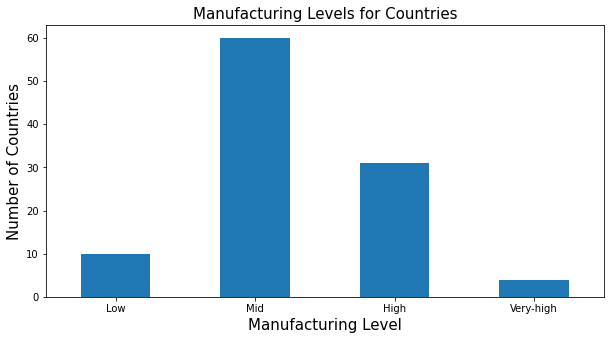

In [ ]:
# Create a bar plot of the manufacturing level counts
man_level_counts.plot(kind='bar', width=0.5)

# Adjust the size of the bars
plt.gcf().set_size_inches(10, 5)

# Adjust the font size of the labels
plt.xticks(rotation=0)
plt.xlabel("Manufacturing Level", fontsize=15)
plt.ylabel("Number of Countries", fontsize=15)
plt.title("Manufacturing Levels for Countries", fontsize=15)

# Show the plot
plt.show()

Lastly, we use the groupby() method to group the data frame by the 'manufacturing_level' column. The method returns a GroupBy object, which we iterate through using a for loop. In each iteration, we print the manufacturing level and the list of countries in that level.

In [ ]:
# Group the dataframe by the 'manufacturing_level' column
grouped_df = merged_man_df.groupby('manufacturing_level')

# Iterate through each group
for level, group_df in grouped_df:
    print(f'Manufacturing Level: {level}')
    print(group_df['country'].tolist())
    print()

Manufacturing Level: Low
['Lebanon', 'Curacao', 'Luxembourg', 'Montenegro', 'Nepal', 'Gambia', 'Ethiopia', 'Iraq', 'Grenada', 'Hong Kong']

Manufacturing Level: Mid
['Brazil', 'Finland', 'South Africa', 'Ukraine', 'Serbia', 'Senegal', 'Chile', 'Costa Rica', 'Malta', 'Colombia', 'Sweden', 'Peru', 'Italy', 'Guatemala', 'France', 'Kyrgyzstan', 'India', 'Qatar', 'Netherlands', 'Belgium', 'Estonia', 'Denmark', 'Nigeria', 'Croatia', 'Burkina Faso', 'Israel', 'Pakistan', 'Kosovo', 'Russia', 'Spain', 'Portugal', 'Zambia', 'Moldova', 'Cameroon', 'United States', 'Kazakhstan', 'Latvia', 'United Kingdom', 'Georgia', 'Iceland', 'Norway', 'Namibia', 'Armenia', 'Benin', 'Cyprus', 'Kenya', 'Mongolia', 'Rwanda', 'Australia', 'Ghana', 'Saudi Arabia', 'Greece', 'Togo', 'United Arab Emirates', 'Azerbaijan', 'Guinea', 'Mali', 'Botswana', 'Albania', 'Angola']

Manufacturing Level: High
['Belarus', 'Argentina', 'Indonesia', 'Czechia', 'Romania', 'Philippines', 'Malaysia', 'Singapore', 'Vietnam', 'Slovenia',

<br>

# Sources
*   https://www.who.int/teams/environment-climate-change-and-health/air-quality-and-health/health-impacts/types-of-pollutants
*   https://www.aqi.in/uk/world-most-polluted-cities#
*   https://waqi.info/
*   https://www.airnow.gov/aqi/aqi-basics/
*   https://www.iqair.com/newsroom/10-most-harmful-air-pollutants-youre-breathing-everyday
*   https://www.who.int/publications/i/item/9789240034228
*   https://www.aqi.in/blog/here-are-the-10-main-causes-of-air-pollution/
*   https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS
*   https://www.iqair.com/world-most-polluted-cities?sort=-rank&page=2&perPage=50&cities=
*   https://aqicn.org/json-api/doc/

